# Random Under Sampling ( Top 5 Algorithms )

*Radom Undersampling is a great technique. It reduces the number of class samples in an imbalanced dataset.But, it can often result in information loss.*

*It is simple & fast. Highly recommended when you want quick baselines*

In [1]:
import pandas as pd
import seaborn as sns

*Loading data. This dataset can be found here - https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease*

In [2]:
df=pd.read_csv(r"C:\\Users\\sunta\\OneDrive\\Desktop\\data\\sampling\\hear_data\\heart_2020_cleaned.csv")

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


*Target Variable is HeartDisease. These values are hugely imbalanced*

c:\Users\sunta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\sunta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='HeartDisease', ylabel='count'>

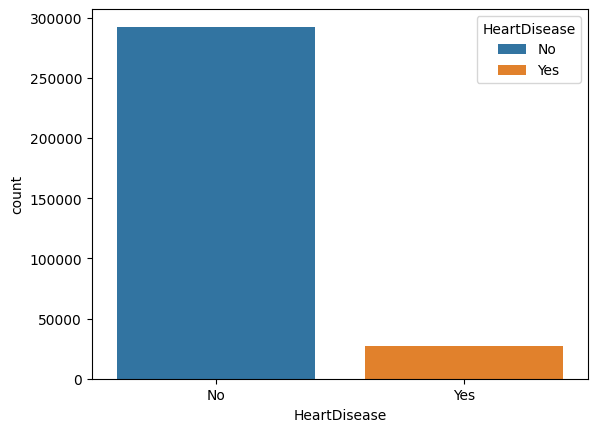

In [4]:
sns.countplot(data=df,x='HeartDisease',hue='HeartDisease',legend=True)

In [5]:
X=df.drop(['HeartDisease',"Race"], axis=1)
y=df['HeartDisease']

# Random Under Sample

In [6]:
from imblearn.under_sampling import RandomUnderSampler 

In [7]:
X_Rus, y_Rus = RandomUnderSampler(sampling_strategy='majority',random_state=42).fit_resample(X,y)

c:\Users\sunta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\sunta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='HeartDisease', ylabel='count'>

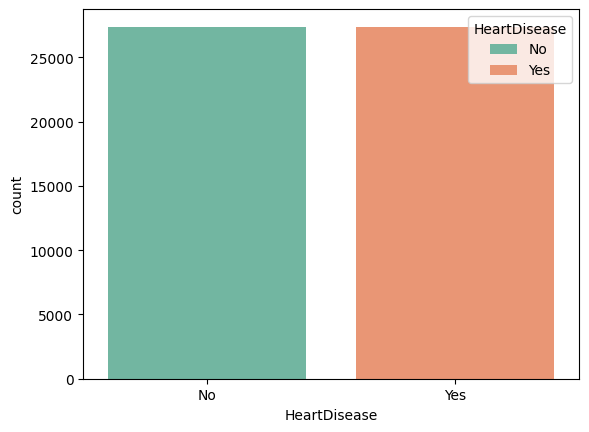

In [8]:
sns.countplot(x = y_Rus, hue=y_Rus, legend=True, palette='Set2')

In [9]:
y_Rus.value_counts()

HeartDisease
No     27373
Yes    27373
Name: count, dtype: int64

# Near Miss Algorithm

*The NearMiss algorithm is a type of undersampling technique used in handling imbalanced datasets. It focuses on selecting a subset of the majority class (usually the "negative" class) to balance the dataset with the minority class (usually the "positive" class). There are three versions: NearMiss-1, NearMiss-2, and NearMiss-3 — each selects majority class samples in a different way.*

*Note: Useful only for numeric data*

| Feature / Version  | NearMiss-1                                                                                   | NearMiss-2                                                                                    | NearMiss-3                                                              |
| ------------------ | -------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------- |
| **Goal**           | Keep majority samples closest to minority                                                    | Keep majority samples farthest from minority                                                  | Keep majority samples that are closest **to** selected minority samples |
| **How it selects** | Select majority samples with **smallest average distance to the 3 closest** minority samples | Select majority samples with **smallest average distance to the 3 farthest** minority samples | For **each minority sample**, select **K nearest majority samples**     |
| **Focus**          | Keeps majority samples that are **borderline** cases                                         | Keeps majority samples that are **clearly different**                                         | Ensures each minority sample is surrounded by some majority samples     |
| **Risk**           | May keep noisy samples                                                                       | May lose borderline cases                                                                     | More balanced around each minority sample                               |


In [12]:
from sklearn.model_selection import  cross_val_score
# now you can import normally from model_selection
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
df1 = df.copy(deep = True)


col = list(df.columns)
categorical_features = []
numerical_features = []
for i in df1.columns:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        df1[i]=le.fit_transform(df1[i])
        categorical_features.append(i)

In [15]:
X=df1.drop(['HeartDisease',"Race"], axis=1)
y=df1['HeartDisease']
X = X.drop(columns=['AgeCategory'])

In [27]:
from imblearn.under_sampling import NearMiss

X_nm,y_nm = NearMiss().fit_resample(X,y) # uses default values
# X_nm,y_nm = NearMiss(version=2,n_neighbors=4).fit_resample(X,y) # Version 2 example

c:\Users\sunta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\sunta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='HeartDisease', ylabel='count'>

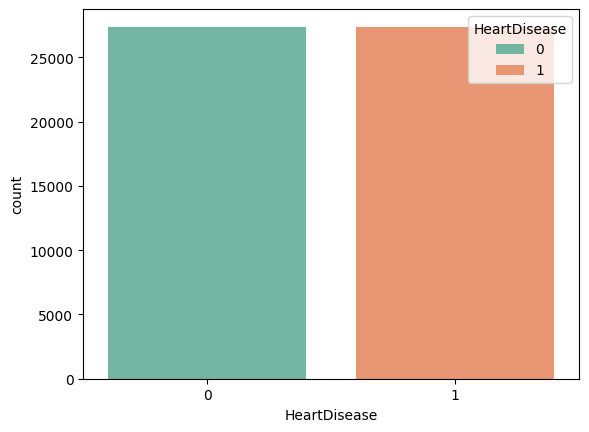

In [25]:
sns.countplot(x=y_nm, hue=y_nm,palette='Set2')

# Tomek Links

*Tomek Links is an undersampling technique used to clean borderline or overlapping examples between classes.*

*Tomek Links method uses the rule to selects the pair of observation (say, a and b) that are fulfilled these properties:*

*The observation a’s nearest neighbor is b.*

*The observation b’s nearest neighbor is a.*

*Observation a and b belong to a different class. That is, a and b belong to the minority and majority class (or vice versa), respectively.*

In [28]:
from imblearn.under_sampling import TomekLinks

X_tomek,y_tomek = TomekLinks().fit_resample(X,y)

In [32]:
y_tomek.value_counts()

HeartDisease
0    284656
1     27373
Name: count, dtype: int64

c:\Users\sunta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\sunta\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='HeartDisease', ylabel='count'>

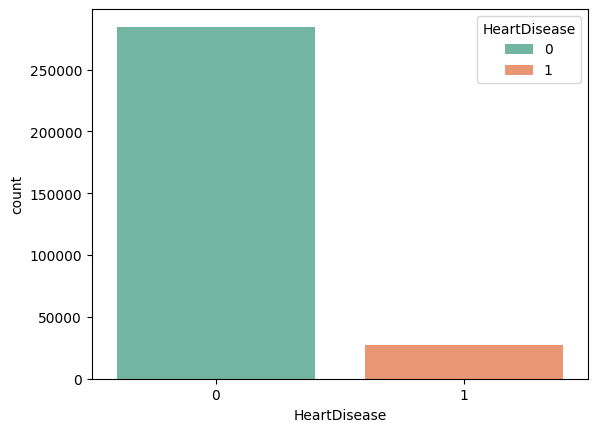

In [29]:
sns.countplot(x=y_tomek,hue=y_tomek,palette='Set2')

*After applying Tomek Links, the dataset remains imbalanced (10:1). While Tomek helps by removing borderline majority class samples, it is not intended to fully balance class distributions. To address the remaining imbalance, combining SMOTE (for oversampling) with Tomek (for cleaning) is a common and effective strategy.*